In [1]:
# Program to plot from the new armstrong OPeNDAP server
#  Plots NCEP Reanalysis Data from defined Year/Month below
#  Reanalysis data available monthly from 1980-2015
#
# Joseph B Zambon
# 1 August 2016

#Dependencies
from pydap.client import open_url
from datetime import datetime
import matplotlib.pyplot as plt
import datetime
import numpy as np
from mpl_toolkits.basemap import Basemap
from matplotlib import cm

In [2]:
# Input desired year/month below
yyyy = 2011
mm   =    8

In [3]:
# For inline plotting
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
date_index = datetime.date.toordinal(datetime.datetime(yyyy,mm,1)) - \
             datetime.date.toordinal(datetime.datetime(1858,11,17,0,0,0))
#print(date_index)

55774


In [5]:
# Full URL: http://armstrong.meas.ncsu.edu:8080/thredds/dodsC/useast/ncep_1985-2015_airp.nc

haibo_url = 'http://armstrong.meas.ncsu.edu:8080/thredds/dodsC/useast/ncep_1985-2015_'
airp = open_url(haibo_url + 'airp.nc')
airq = open_url(haibo_url + 'airq.nc')
airt = open_url(haibo_url + 'airt.nc')
dlrf = open_url(haibo_url + 'dlrf.nc')
srf = open_url(haibo_url + 'srf.nc')
rain = open_url(haibo_url + 'rain.nc')
uw = open_url(haibo_url + 'uw.nc')
vw = open_url(haibo_url + 'vw.nc')
# print(airp.keys)
# print(airq.keys)
# print(airt.keys)
# print(dlrf.keys)
# print(srf.keys)
# print(rain.keys)
# print(uw.keys)
# print(vw.keys)
lat  = np.array(airp['lat'])
lon  = np.array(airp['lon'])
airp = np.squeeze(np.array(airp['Pressure']\
                           [np.int(np.where(date_index==np.array(airp['Time']))[0]),:,:]))
airq = np.squeeze(np.array(airq['Relative_Humidity']\
                           [np.int(np.where(date_index==np.array(airq['Time']))[0]),:,:]))
airt = np.squeeze(np.array(airt['Temperature']\
                           [np.int(np.where(date_index==np.array(airt['Time']))[0]),:,:]))
dlrf = np.squeeze(np.array(dlrf['Downwelling_Longwave_Radiation']\
                           [np.int(np.where(date_index==np.array(dlrf['Time']))[0]),:,:]))
srf  = np.squeeze(np.array(srf['Solar_Shortwave_Radiation']\
                           [np.int(np.where(date_index==np.array(srf['Time']))[0]),:,:]))
rain = np.squeeze(np.array(rain['Rainfall']\
                           [np.int(np.where(date_index==np.array(rain['Time']))[0]),:,:])) * 86400
uw   = np.squeeze(np.array(uw['UWind']\
                           [np.int(np.where(date_index==np.array(uw['Time']))[0]),:,:]))
vw   = np.squeeze(np.array(vw['VWind']\
                           [np.int(np.where(date_index==np.array(vw['Time']))[0]),:,:]))
# print(np.shape(airp))
# print(np.shape(airq))
# print(np.shape(airt))
# print(np.shape(dlrf))
# print(np.shape(srf))
# print(np.shape(rain))
# print(np.shape(uw))
# print(np.shape(vw))

/home/jbzambon/anaconda3/envs/cnaps/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


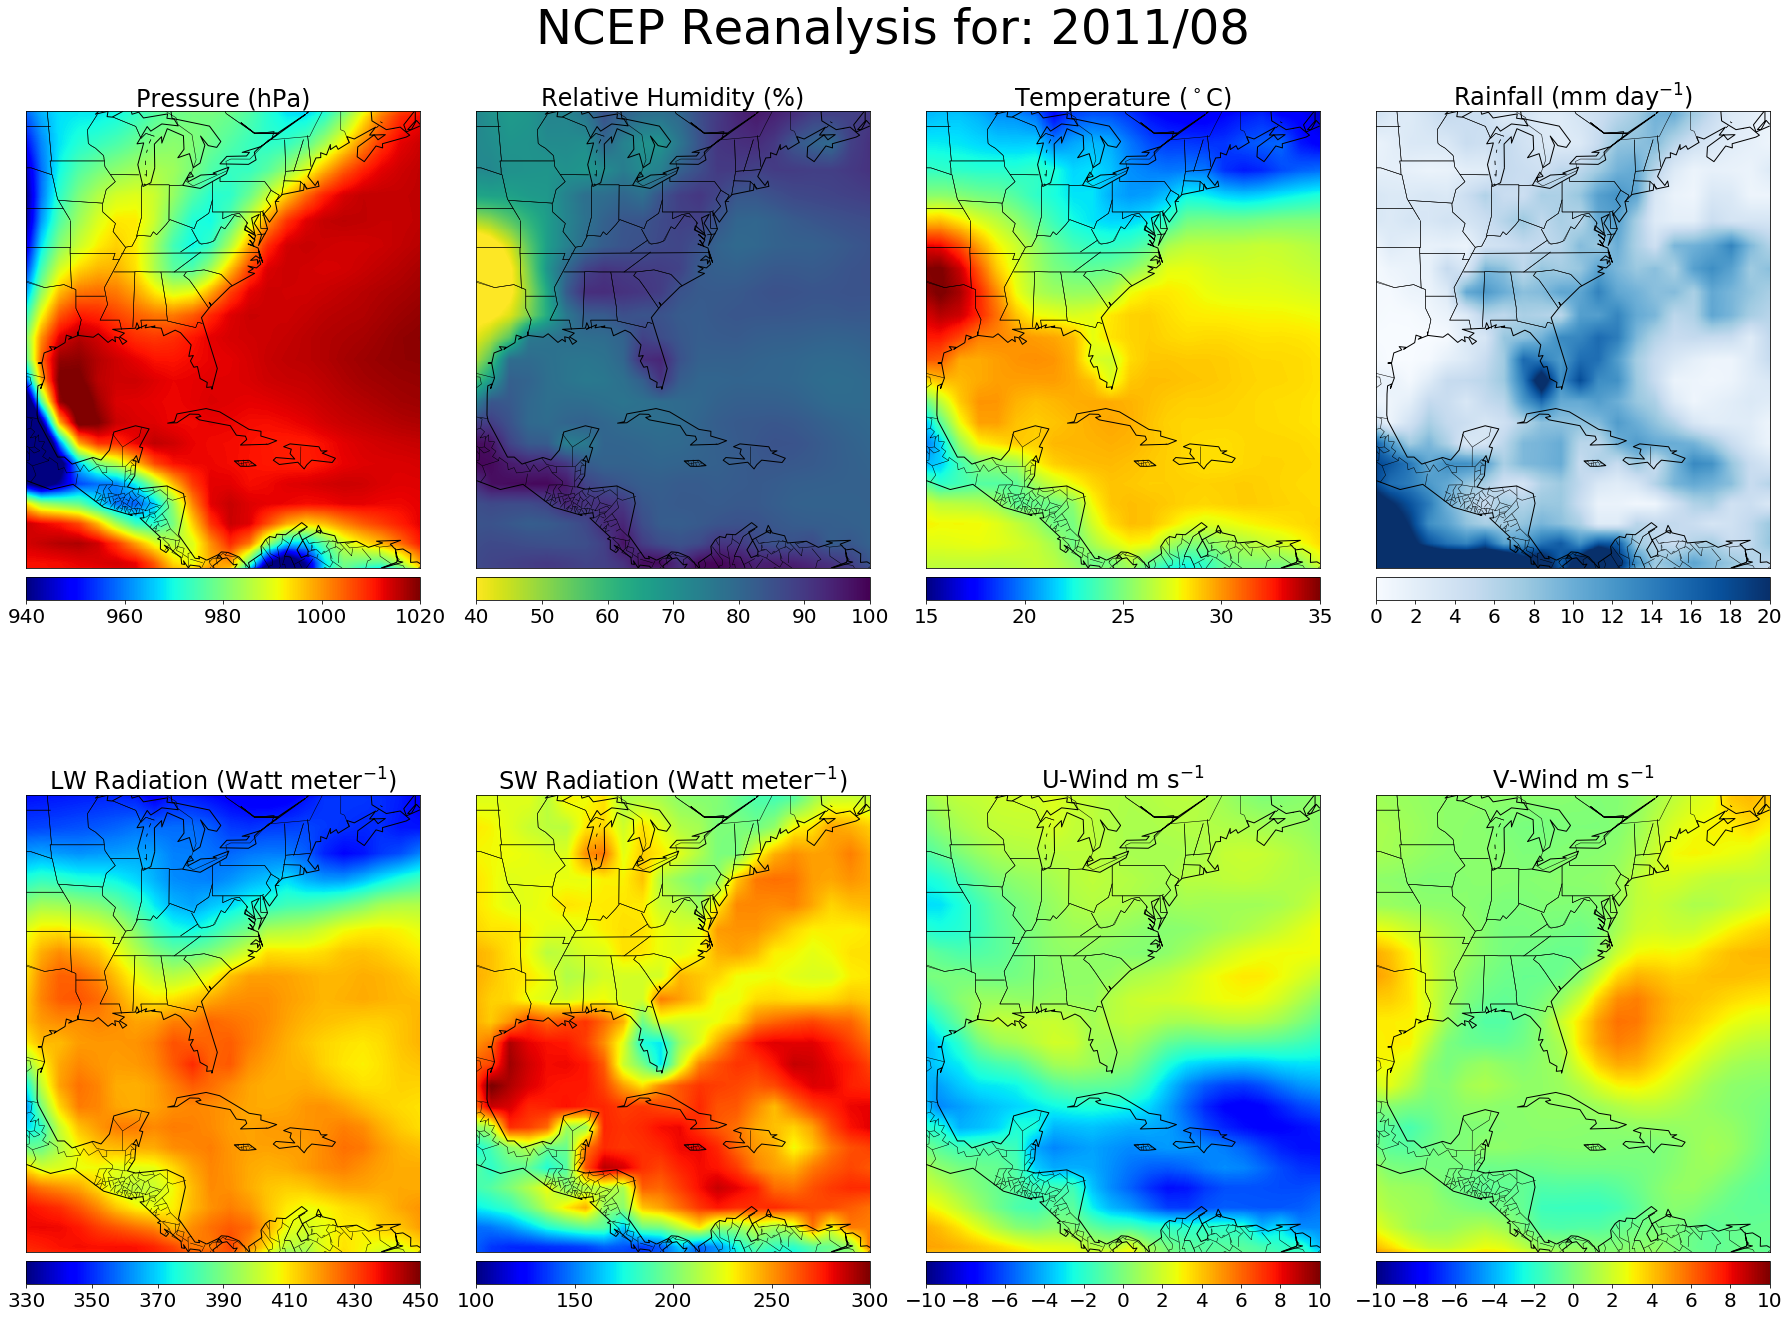

In [32]:
figsize(25,20)
plt.clf()
plt.suptitle(('NCEP Reanalysis for: ' + str(yyyy) + '/' + str(mm).zfill(2)),fontsize=48,family='Helvetica')
plt.subplot(2,4,1)
map = Basemap(projection='merc',
    resolution='c',lat_0=((np.max(lat[:,1])-np.min(lat[:,1]))/2),
    lon_0=((np.max(lon[1,:])-np.min(lon[1,:]))/2),
    llcrnrlon=np.min(lon[1,:]),llcrnrlat=np.min(lat[:,1]),
    urcrnrlon=np.max(lon[1,:]),urcrnrlat=np.max(lat[:,1]))
map.drawcoastlines()
map.drawcountries()
map.drawstates()
map.pcolormesh(lon,lat,airp[:,:],cmap='jet',vmin=940,vmax=1020,latlon='true')
cbar=map.colorbar(location='bottom',ticks=np.arange(940,1020+1e-10,20))
cbar.ax.tick_params(labelsize=20)
plt.title(('Pressure (hPa)'),fontsize=24,family='Helvetica')

plt.subplot(2,4,2)
map = Basemap(projection='merc',
    resolution='c',lat_0=((np.max(lat[:,1])-np.min(lat[:,1]))/2),
    lon_0=((np.max(lon[1,:])-np.min(lon[1,:]))/2),
    llcrnrlon=np.min(lon[1,:]),llcrnrlat=np.min(lat[:,1]),
    urcrnrlon=np.max(lon[1,:]),urcrnrlat=np.max(lat[:,1]))
map.drawcoastlines()
map.drawcountries()
map.drawstates()
map.pcolormesh(lon,lat,airq[:,:],cmap='viridis_r',vmin=40,vmax=100,latlon='true')
cbar=map.colorbar(location='bottom',ticks=np.arange(40,100+1e-10,10))
cbar.ax.tick_params(labelsize=20)
plt.title(('Relative Humidity (%)'),fontsize=24,family='Helvetica')

plt.subplot(2,4,3)
map = Basemap(projection='merc',
    resolution='c',lat_0=((np.max(lat[:,1])-np.min(lat[:,1]))/2),
    lon_0=((np.max(lon[1,:])-np.min(lon[1,:]))/2),
    llcrnrlon=np.min(lon[1,:]),llcrnrlat=np.min(lat[:,1]),
    urcrnrlon=np.max(lon[1,:]),urcrnrlat=np.max(lat[:,1]))
map.drawcoastlines()
map.drawcountries()
map.drawstates()
map.pcolormesh(lon,lat,airt[:,:],cmap='jet',vmin=15,vmax=35,latlon='true')
cbar=map.colorbar(location='bottom',ticks=np.arange(15,35+1e-10,5))
cbar.ax.tick_params(labelsize=20)
plt.title(('Temperature ($^\circ$C)'),fontsize=24,family='Helvetica')

plt.subplot(2,4,4)
map = Basemap(projection='merc',
    resolution='c',lat_0=((np.max(lat[:,1])-np.min(lat[:,1]))/2),
    lon_0=((np.max(lon[1,:])-np.min(lon[1,:]))/2),
    llcrnrlon=np.min(lon[1,:]),llcrnrlat=np.min(lat[:,1]),
    urcrnrlon=np.max(lon[1,:]),urcrnrlat=np.max(lat[:,1]))
map.drawcoastlines()
map.drawcountries()
map.drawstates()
map.pcolormesh(lon,lat,rain[:,:],cmap='Blues',vmin=0,vmax=20,latlon='true',)
cbar=map.colorbar(location='bottom',ticks=np.arange(0,20+1e-10,2))
cbar.ax.tick_params(labelsize=20)
plt.title(('Rainfall (mm day$^{-1}$)'),fontsize=24,family='Helvetica')

plt.subplot(2,4,5)
map = Basemap(projection='merc',
    resolution='c',lat_0=((np.max(lat[:,1])-np.min(lat[:,1]))/2),
    lon_0=((np.max(lon[1,:])-np.min(lon[1,:]))/2),
    llcrnrlon=np.min(lon[1,:]),llcrnrlat=np.min(lat[:,1]),
    urcrnrlon=np.max(lon[1,:]),urcrnrlat=np.max(lat[:,1]))
map.drawcoastlines()
map.drawcountries()
map.drawstates()
map.pcolormesh(lon,lat,dlrf[:,:],cmap='jet',vmin=330,vmax=450,latlon='true')
cbar=map.colorbar(location='bottom',ticks=np.arange(330,450+1e-10,20))
cbar.ax.tick_params(labelsize=20)
plt.title(('LW Radiation (Watt meter$^{-1}$)'),fontsize=24,family='Helvetica')

plt.subplot(2,4,6)
map = Basemap(projection='merc',
    resolution='c',lat_0=((np.max(lat[:,1])-np.min(lat[:,1]))/2),
    lon_0=((np.max(lon[1,:])-np.min(lon[1,:]))/2),
    llcrnrlon=np.min(lon[1,:]),llcrnrlat=np.min(lat[:,1]),
    urcrnrlon=np.max(lon[1,:]),urcrnrlat=np.max(lat[:,1]))
map.drawcoastlines()
map.drawcountries()
map.drawstates()
map.pcolormesh(lon,lat,srf[:,:],cmap='jet',vmin=100,vmax=300,latlon='true')
cbar=map.colorbar(location='bottom',ticks=np.arange(100,300+1e-10,50))
cbar.ax.tick_params(labelsize=20)
plt.title(('SW Radiation (Watt meter$^{-1}$)'),fontsize=24,family='Helvetica')

plt.subplot(2,4,7)
map = Basemap(projection='merc',
    resolution='c',lat_0=((np.max(lat[:,1])-np.min(lat[:,1]))/2),
    lon_0=((np.max(lon[1,:])-np.min(lon[1,:]))/2),
    llcrnrlon=np.min(lon[1,:]),llcrnrlat=np.min(lat[:,1]),
    urcrnrlon=np.max(lon[1,:]),urcrnrlat=np.max(lat[:,1]))
map.drawcoastlines()
map.drawcountries()
map.drawstates()
map.pcolormesh(lon,lat,uw[:,:],cmap='jet',vmin=-10,vmax=10,latlon='true')
cbar=map.colorbar(location='bottom',ticks=np.arange(-10,10+1e-10,2))
cbar.ax.tick_params(labelsize=20)
plt.title(('U-Wind m s$^{-1}$'),fontsize=24,family='Helvetica')

plt.subplot(2,4,8)
map = Basemap(projection='merc',
    resolution='c',lat_0=((np.max(lat[:,1])-np.min(lat[:,1]))/2),
    lon_0=((np.max(lon[1,:])-np.min(lon[1,:]))/2),
    llcrnrlon=np.min(lon[1,:]),llcrnrlat=np.min(lat[:,1]),
    urcrnrlon=np.max(lon[1,:]),urcrnrlat=np.max(lat[:,1]))
map.drawcoastlines()
map.drawcountries()
map.drawstates()
map.pcolormesh(lon,lat,vw[:,:],cmap='jet',vmin=-10,vmax=10,latlon='true',)
cbar=map.colorbar(location='bottom',ticks=np.arange(-10,10+1e-10,2))
cbar.ax.tick_params(labelsize=20)
plt.title(('V-Wind m s$^{-1}$'),fontsize=24,family='Helvetica')

plt.tight_layout()
plt.savefig('ncep_'+ str(yyyy) + str(mm).zfill(2))